# Lab 4: Predicting breast cancer with machine learning

In this lab we'll read up our training and test data to create a logistic regression model. We'll use different techniques to evaluate the model and use the model for prediction on a held-out dataset. 

#### Libraries used in this lab:
[pandas docs](https://pandas.pydata.org/pandas-docs/stable/)

[seaborn docs](https://seaborn.pydata.org/)

[matplotlib docs](https://matplotlib.org/contents.html)

[numpy docs](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html)

[sklearn docs](https://scikit-learn.org/stable/documentation.html)

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [19]:
train = pd.read_csv("data_sets/lab_4_train.csv")
test = pd.read_csv("data_sets/lab_4_test.csv")

notes about transforming target value into 1/0 from M/B to fascilitate modeling and evaluation methods

In [20]:
# transform B/M labels to ints, 1 = Malignant, 0 = Benign
le = sklearn.preprocessing.LabelEncoder()
le.fit(train['diagnosis'])
train['diagnosis_code'] = le.transform(train['diagnosis']) 
test['diagnosis_code'] = le.transform(test['diagnosis']) 

test.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,radius_standard_error,texture_standard_error,smoothness_standard_error,compactness_standard_error,symmetry_standard_error,diagnosis_code
0,M,19.170,24.80,0.09740,0.24580,0.2397,0.9555,3.5680,0.003139,0.08297,0.04484,1
1,B,12.220,20.04,0.10960,0.11520,0.2124,0.1811,0.7959,0.006272,0.02198,0.01320,0
2,M,20.160,19.66,0.08020,0.08564,0.1928,0.5925,0.6863,0.004536,0.01376,0.02193,1
3,B,8.888,14.64,0.09783,0.15310,0.1902,0.5262,0.8522,0.017210,0.09368,0.02541,0
4,B,16.170,16.07,0.09880,0.14380,0.1990,0.1745,0.4890,0.004510,0.01812,0.01934,0


notes about executing a logistic regression with all the features we've selected and with the new target values

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

features = train.columns.tolist()
features.remove('diagnosis_code')
features.remove('diagnosis')
logreg = LogisticRegression(solver='lbfgs',max_iter=10000)
logreg.fit(train[features], train['diagnosis_code'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

notes on metrics we're looking at, error and accuracy etc.

In [22]:
y_pred = logreg.predict(test[features])
y_true = test['diagnosis_code']
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test[features], y_true)))
print('log loss of logistic regression classifier on test set: {:.2f}'.format(metrics.log_loss(y_true, y_pred)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test[features], y_true)))

from sklearn.metrics import classification_report
print(classification_report(test['diagnosis_code'], y_pred))

log loss of logistic regression classifier on test set: 4.11
Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        90
           1       0.93      0.74      0.82        53

   micro avg       0.88      0.88      0.88       143
   macro avg       0.89      0.85      0.87       143
weighted avg       0.89      0.88      0.88       143



if we plot the probabilities what do we see? does the sigmoid shape give us the best discrimiatino between classes?

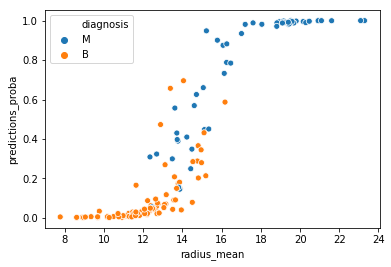

In [23]:
# plot predictions, sigmoid

test['predictions_proba'] = logreg.predict_proba(test[features])[:,1]
sns.scatterplot(x="radius_mean", y="predictions_proba", hue = "diagnosis", data=test)

try out a few different values for C, can you make accuracy go up and error go down? why?

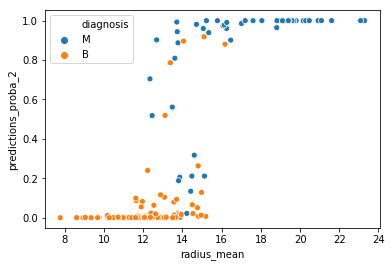

In [24]:
#regularization
logreg2 = LogisticRegression(solver='lbfgs', penalty="l2", C=10000000000, max_iter=10000)
logreg2.fit(train[features], train['diagnosis_code'])
test['predictions_proba_2'] = logreg2.predict_proba(test[features])[:,1]
sns.scatterplot(x="radius_mean", y="predictions_proba_2", hue = "diagnosis", data=test)

In [25]:
y_pred2 = logreg2.predict(test[features])
print('log loss of regularized logistic regression classifier on test set: {:.2f}'.format(metrics.log_loss(y_true, y_pred2)))
print('Accuracy of regularized logistic regression classifier on test set: {:.2f}'.format(logreg2.score(test[features], y_true)))


log loss of regularized logistic regression classifier on test set: 2.90
Accuracy of regularized logistic regression classifier on test set: 0.92


In [86]:
#bias v variance